In [290]:
from ase.io import read, write
from ase import Atoms
from ase.visualize import view
import numpy as np
from mbpol_calculator import MbpolCalculator
import pandas as pd
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [73]:
atoms = read('hbond_start.traj','0')

In [268]:
oo = np.arange(2.75, 3.18, 0.03)
oh = np.arange(0.93,1.00, 0.004)
OO, OH = np.meshgrid(oo,oh)

In [271]:
mesh = []
for oo, oh in zip(OO.flatten(), OH.flatten()):
    new_atoms = Atoms(atoms)
    positions = new_atoms.get_positions()
    positions[1] = [0,0,oh]
    positions[3:,2] = [oo,oo + 0.583, oo + 0.583]
    new_atoms.set_positions(positions)
    mesh.append(new_atoms)

In [272]:
energies = []
for m in mesh:
    energy = MbpolCalculator(m).get_potential_energy(m)
    energies.append(energy)

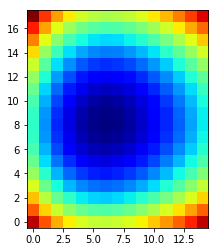

In [277]:
imshow(np.array(energies).reshape(OO.shape), origin='left', cmap='jet')

In [285]:
energies = np.array(energies).reshape(OO.shape)

In [323]:
def parabola(a, b, c, d, x0, y0):
    """Returns a gaussian function with the given parameters"""
    a = float(a)
    b = float(b)
    c = float(c)
    x0 = float(x0)
    y0 = float(y0)
    return lambda x,y: a*(x-x0)**2 + b*(y-y0)**2+ d*(x-x0)*(y-y0) + c

def fitparabola(data, params):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    
    errorfunction = lambda p: np.ravel(parabola(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

In [353]:
len(oo)

15

In [354]:
len(oh)

18

array([ 0.44665853, 24.26795499, -0.17631686, -0.12861184,  3.0029878 ,
        0.95733612])

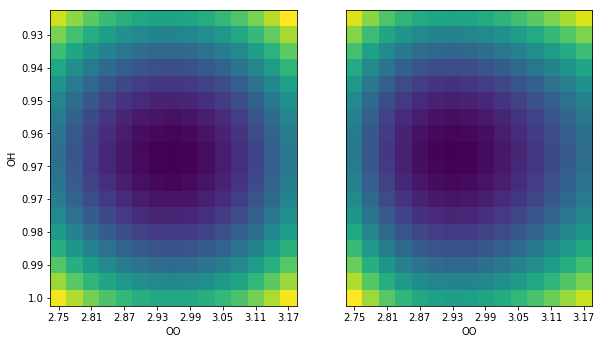

In [394]:
oo = np.arange(2.75, 3.18, 0.03)
oh = np.arange(0.93,1.00, 0.004)

params = 2,0.2,0,0.001, 7,9
params = fitparabola(energies, params)

figsize(15,6)
energies_fitted = parabola(*params)(*np.indices(energies.shape))
subplot(1,3,1)
imshow(energies_fitted)
xlabel('OO')
ylabel('OH')
xticks(list(range(len(oo))[::2]),oo.round(2)[::2])
yticks(list(range(len(oh))[1::2]),oh.round(2)[1::2])
subplot(1,3,2)
imshow(energies)
xlabel('OO')
# ylabel('OH')
xticks(list(range(len(oo))[::2]),oo.round(2)[::2])
yticks([])
# subplot(1,3,3)
# imshow(energies - energies_fitted)

# colorbar()
params/[0.03**2,0.004**2,1,0.03*0.004,1/0.03,1/0.004] + [0,0,0,0,2.75,0.93]
# params

In [388]:
energies_pbe = np.genfromtxt('./e_surface_data/energies_siesta.dat').reshape(OO.shape)

array([ 4.65295910e-01,  2.54562932e+01, -9.40026009e+02,  3.75350605e-02,
        3.10003232e+00,  9.55233384e-01])

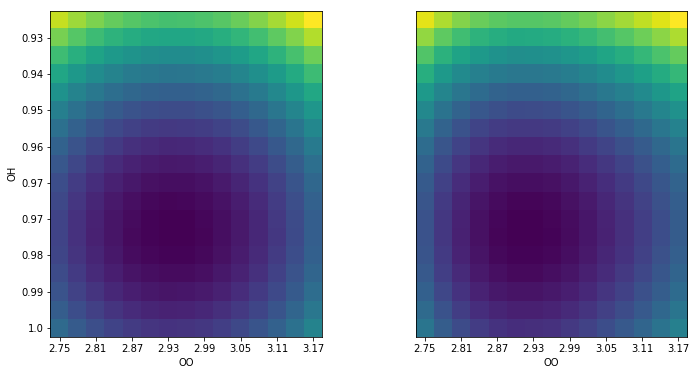

In [395]:

params =0,0,0,0,0,0
params = fitparabola(energies_pbe, params)

figsize(12,6)
energies_fitted = parabola(*params)(*np.indices(energies.shape))
subplot(1,2,1)
imshow(energies_fitted)
xlabel('OO')
ylabel('OH')
xticks(list(range(len(oo))[::2]),oo.round(2)[::2])
yticks(list(range(len(oh))[1::2]),oh.round(2)[1::2])

subplot(1,2,2)

xlabel('OO')
xticks(list(range(len(oo))[::2]),oo.round(2)[::2])
yticks([])
imshow(energies_pbe)

# subplot(1,3,3)
# imshow(energies_pbe-energies_fitted)
# colorbar()
params
params/[0.03**2,0.004**2,1,0.03*0.004,1/0.03,1/0.004] + [0,0,0,0,2.75,0.93]